In [25]:
from main import DataFramePreprocessor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

dfp = DataFramePreprocessor()
reg = linear_model.LinearRegression()


In [26]:
df = dfp.summarize_player_statistics(element_type=4)
df.index

Index(['Watkins', 'Haaland', 'J.Alvarez', 'Solanke', 'Cunha', 'Darwin',
       'Morris', 'João Pedro', 'Adebayo', 'Isak',
       ...
       'Marsh', 'Marshall', 'Muskwe', 'Ndiaye', 'Ola-Adebomi', 'Osong',
       'O’Mahony', 'Pepple', 'Plange', 'Zeqiri'],
      dtype='object', name='web_name', length=105)

In [27]:
# var = ['minutes', 'shots', 'SoT', 'SiB', 'xG', 'npxG', 'G', 'npG',
#             'key_passes', 'xA', 'A', 'xGC', 'GC', 'xCS', 'CS', 'xGI', 'npxGI', 'xP'
#             , 'PvsxP', 'pos_touches', 'Att Pen',
#             'carries_final_third', 'carries_penalty_area']
var = ['minutes', 'G', 'A', 'carries_penalty_area']

Y = df[var]
X = df['total_points'].values.reshape(-1, 1)
y = np.arange(0, len(var))

reg.fit(X, Y)

LinearRegression()

In [28]:

for col_num in y:
    reg.fit(X, Y.iloc[:, col_num])
    print('설명변수명 : {}'.format(Y.columns[col_num]))
    print('회귀계수:', reg.coef_)
    print('절편:', reg.intercept_)
    print('결정계수 : {:.3f}'.format(reg.score(X, Y.iloc[:, col_num])))
    print('')

설명변수명 : minutes
회귀계수: [16.78399456]
절편: 26.93355668916297
결정계수 : 0.922

설명변수명 : G
회귀계수: [0.08872246]
절편: -0.26470800090655855
결정계수 : 0.895

설명변수명 : A
회귀계수: [0.03691226]
절편: -0.2453045848975156
결정계수 : 0.620

설명변수명 : carries_penalty_area
회귀계수: [0.17539566]
절편: 0.20216309466117188
결정계수 : 0.615



In [29]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


Y = pd.DataFrame(df, columns=['total_points'])
Y.fillna(0, inplace=True)
X = df[var]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5, random_state=0)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

full_model = sm.OLS(y_train, X_train_scaled)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_points   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              19.91
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                    1.02e-09
Time:                        20:20:15   Log-Likelihood:                         -238.52
No. Observations:                  52   AIC:                                      485.0
Df Residuals:                      48   BIC:                                      492.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.1650      9.448      1.499      0.140      -4.831      33.161
x2            12.7521      6.619      1.927      0.060      -0.556      26.060
x3             5.4725      4.958      1.104      0.275      -4.496      15.440
x4             0.8642      6.542      0.132      0.895     -12.290      14.018
==============================================================================
Omnibus:                       12.458   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               31.788
Skew:                          -0.427   Prob(JB):                     1.25e-07
Kurtosis:                       6.734   Cond. No.                         5.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaled_df = df[var]
scaled_df[var] = scaler.fit_transform(df[var])

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]
vif['features'] = scaled_df.columns
vif

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_37732/3579230553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[var] = scaler.fit_transform(df[var])


,VIF Factor,features
0,6.932774,minutes
1,4.143904,G
2,2.180244,A
3,3.302173,carries_penalty_area


In [31]:
X2 = pd.DataFrame(scaled_df, columns = var)

X2.corr()

,minutes,G,A,carries_penalty_area
minutes,1.000000,0.861143,0.714251,0.829136
G,0.861143,1.000000,0.691991,0.680937
A,0.714251,0.691991,1.000000,0.632916
carries_penalty_area,0.829136,0.680937,0.632916,1.000000


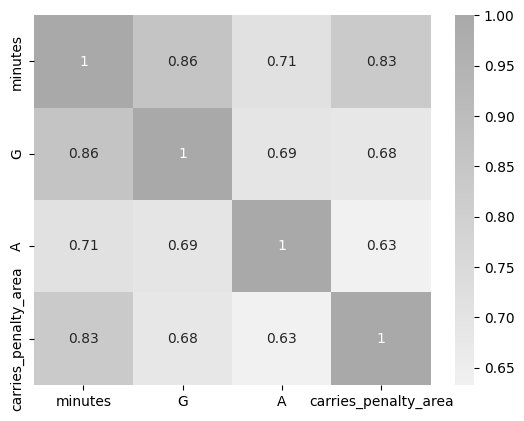

In [32]:
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X2.corr(), annot=True, cmap=cmap)
plt.show()